<a href="https://colab.research.google.com/github/ranubansal/DSML-Projects/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 60.7MB/s]


In [ ]:
df= pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df['director'].nunique()

4528

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Q2 Comparison of tv shows vs. movies.

Q1 How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
df['release_year'].value_counts().head(20)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

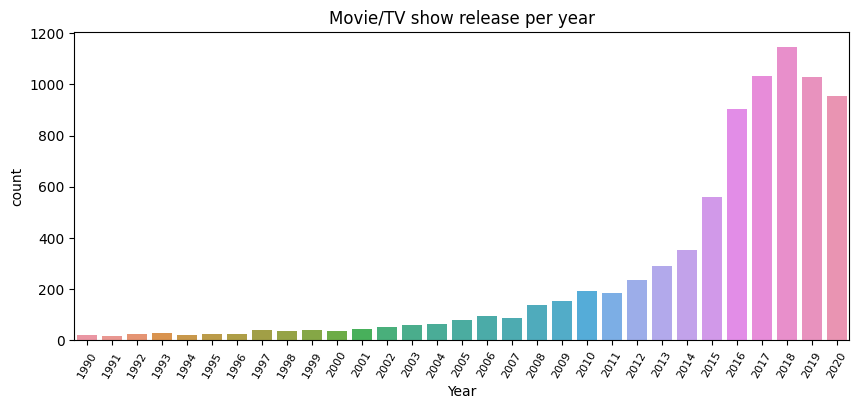

In [ ]:
import seaborn as sns
df_year= df[(df['release_year']>=1990)& (df['release_year']<2021)]
plt.figure(figsize=(10,4))
sns.countplot(data=df_year, x='release_year')
plt.title('Movie/TV show release per year')
plt.xlabel('Year')
plt.xticks(fontsize= 8, rotation=60)
plt.show()

In [ ]:
df['release_year'].count()

8807

In [ ]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df['director'].fillna('unknown director', inplace= True)
df['cast'].fillna('unknown', inplace= True)
df['country'].fillna('unknown country', inplace= True)
df['date_added'].fillna(0, inplace= True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown director,unknown,unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']= df['date_added'].dt.year
df['month_name']=df['date_added'].dt.month_name()
df['month_added']= df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_name,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,9
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,9
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown,unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,9
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int64         
 13  month_name    8807 non-null   object        
 14  month_added   8807 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace= True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_name      0
month_added     0
dtype: int64

Q1- Find the counts of each categorical variable both using graphical and nongraphical analysis.
-Non Graphical
-Graphical

In [ ]:
df['type'].value_counts()

Movie      6126
TV Show    2674
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

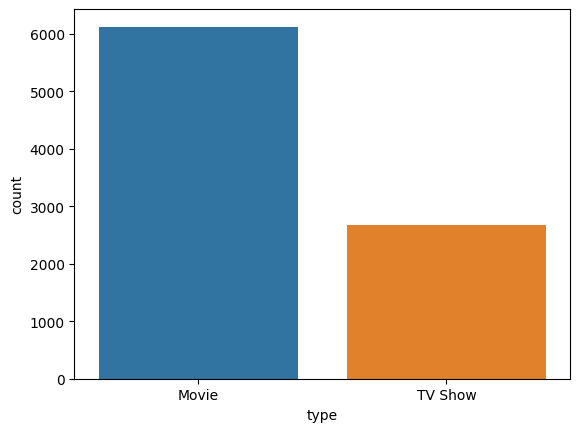

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='type')

Q2- Comparison of tv shows vs. movies.

a. Find the number of movies produced in each country and pick the top 10
countries

In [ ]:
df_new= df[df['type']=='Movie']
df_new.reset_index()
df_new.groupby('country')['title'].nunique().sort_values(ascending= False).head(10)



country
United States      2055
India               893
unknown country     439
United Kingdom      206
Canada              122
Spain                97
Egypt                92
Nigeria              86
Indonesia            77
Turkey               76
Name: title, dtype: int64

Q2- Comparison of tv shows vs. movies.

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [ ]:
df_new= df[df['type']=='TV Show']
df_new.reset_index()
df_new.groupby('country')['title'].nunique().sort_values(ascending= False).head(10)

country
United States      760
unknown country    391
United Kingdom     213
Japan              168
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Spain               48
Name: title, dtype: int64

3. What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis
-Movie

In [ ]:
df['week_added']= df['date_added'].dt.week
df_new= df[df['type']=='Movie']
df_new.reset_index()
df_new.groupby('week_added')['type'].count().sort_values(ascending= False).head(10)

<ipython-input-36-ed8333ed2266>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added']= df['date_added'].dt.week


week_added
1     316
44    243
40    215
9     206
26    195
35    189
31    185
13    174
18    173
27    154
Name: type, dtype: int64

3. What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis
-TV Show

In [ ]:
df_new= df[df['type']=='TV Show']
df_new.reset_index()
df_new.groupby('week_added')['type'].count().sort_values(ascending= False).head(10)

week_added
27    86
31    83
13    76
44    75
24    75
35    74
26    73
5     72
40    72
50    70
Name: type, dtype: int64

Q3 What is the best time to launch a TV show?
b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies
-Movie

In [ ]:
df_new= df[df['type']=='Movie']
df_new.groupby('month_name')['type'].count().sort_values(ascending= False)

month_name
July         565
April        549
December     547
January      545
October      545
March        528
August       518
September    518
November     498
June         492
May          439
February     382
Name: type, dtype: int64

<Axes: xlabel='month_name', ylabel='count'>

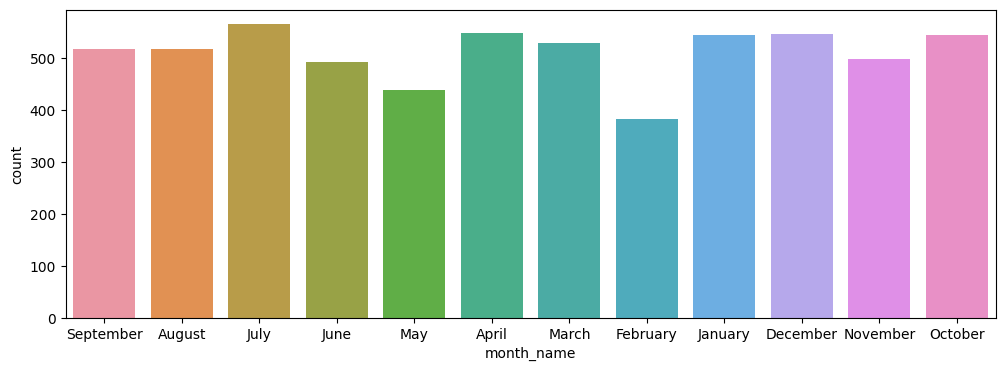

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_new, x='month_name')


Q3 What is the best time to launch a TV show?

b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies
-TV Show

In [ ]:
df_new= df[df['type']=='TV Show']
df_new.groupby('month_name')['type'].count().sort_values(ascending= False)

month_name
December     265
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
January      202
May          193
February     180
Name: type, dtype: int64

<Axes: xlabel='month_name', ylabel='count'>

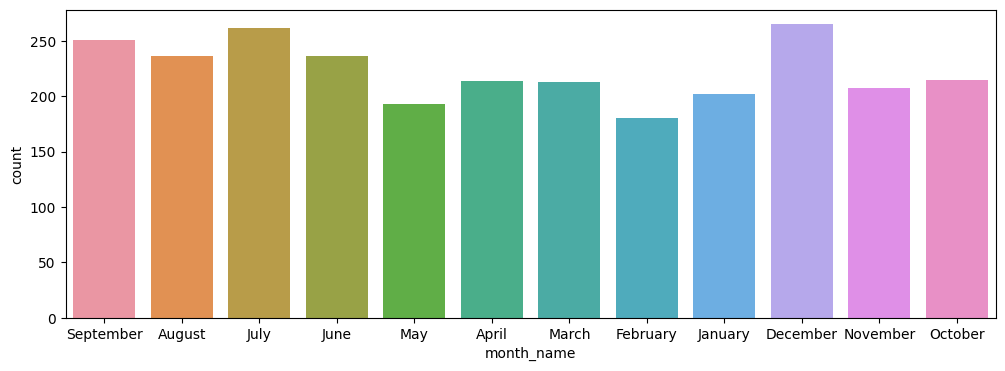

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_new, x='month_name')

Q4 Analysis of actors/directors of different types of shows/movies.

In [ ]:
df.groupby('cast')['title'].nunique().sort_values(ascending= False)

cast
unknown                                                                                                                                                                                                                                                825
David Attenborough                                                                                                                                                                                                                                      19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                                                                 14
Samuel West                                                                                                                                                                                                                                       

In [ ]:
df.groupby('director')['title'].nunique().sort_values(ascending= False)

director
unknown director                         2631
Rajiv Chilaka                              19
Raúl Campos, Jan Suter                     18
Suhas Kadav                                16
Marcus Raboy                               16
                                         ... 
Jose Gomez                                  1
Jose Javier Reyes                           1
Billy Bob Thornton                          1
Joseduardo Giordano, Sergio Goyri Jr.       1
Khaled Youssef                              1
Name: title, Length: 4527, dtype: int64

5. Which genre movies are more popular or produced more

In [ ]:
from collections import Counter

genres=list(df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

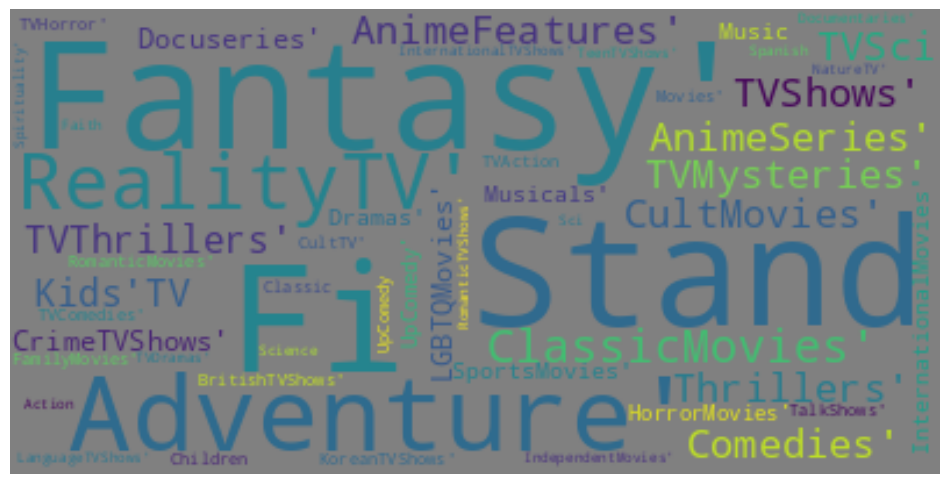

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (12, 12)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="gray").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

plt.show()

6. Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)
-Movie should be added in the same year of release so the viewer are more excited to watch the new movies. after time pass craze for some movies or shows declined


Q How has the number of movies released per year changed over the last 20-30 years?

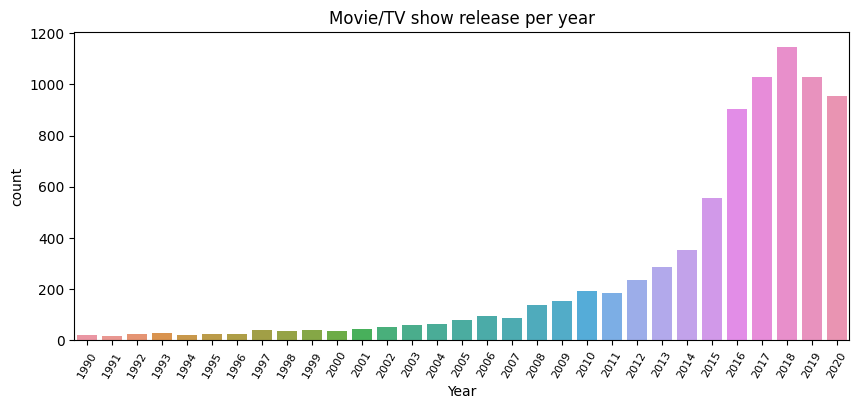

In [ ]:
df_year= df[(df['release_year']>=1990)& (df['release_year']<2021)]
plt.figure(figsize=(10,4))
sns.countplot(data=df_year, x='release_year')
plt.title('Movie/TV show release per year')
plt.xlabel('Year')
plt.xticks(fontsize= 8, rotation=60)
plt.show()

2. Comparison of tv shows vs. movies


In [ ]:
x=df.groupby(['type'])['type'].count()
y=len(df)
ratio=((x/y)).round(2)

movie_tvshow_ratio = pd.DataFrame(ratio).T
movie_tvshow_ratio

type,Movie,TV Show
type,0.7,0.3


What is the best time to launch a TV show?

In [ ]:
df['country'].value_counts().head(5)

United States      2815
India               972
unknown country     830
United Kingdom      419
Japan               244
Name: country, dtype: int64

In [ ]:
df_us= df[df['country'].str.contains ('United States')]
df_us

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_name,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,9,38
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,9,38
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,9,38
15,s16,TV Show,Dear White People,unknown director,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021,September,9,38
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,September,9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,2019,November,11,47
8797,s8798,TV Show,Zak Storm,unknown director,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,September,9,37
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November,11,47
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November,11,44


In [ ]:
from collections import Counter

genres=list(df_us['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

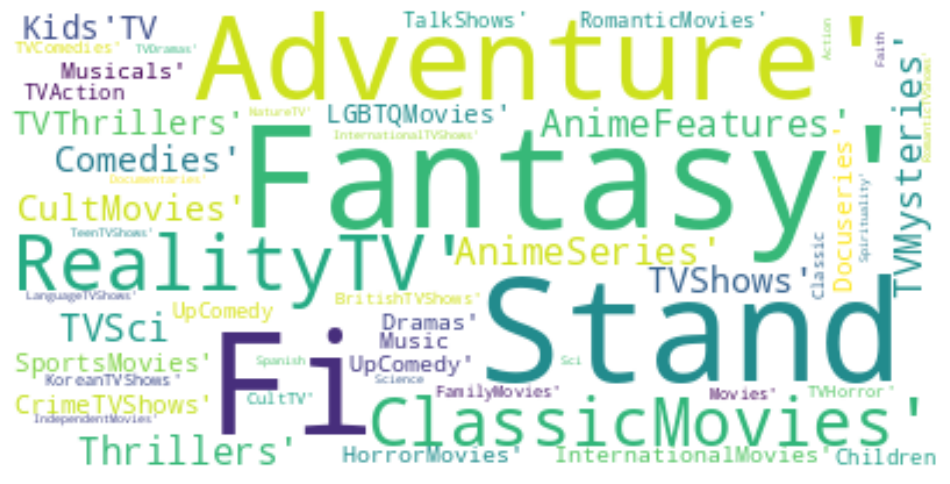

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (12, 12)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

plt.show()

In [ ]:
from collections import Counter

genres=list(df_india['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

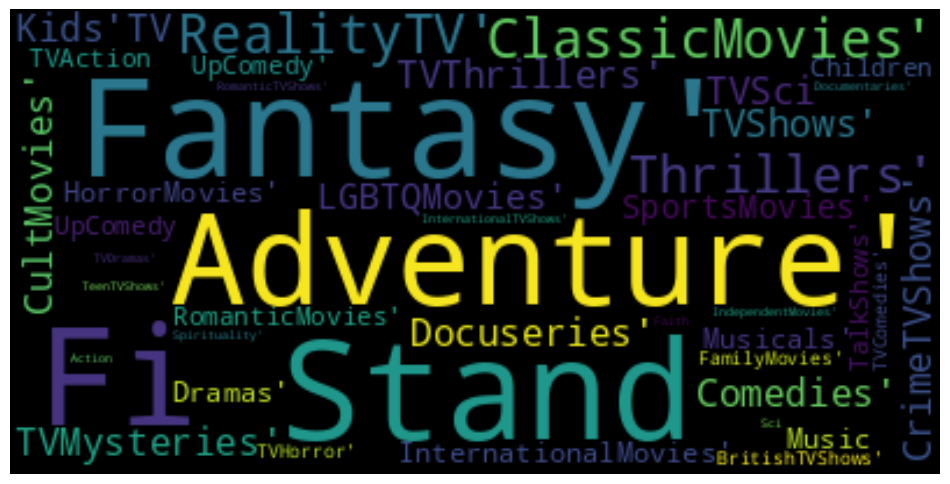

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (12, 12)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

plt.show()

<BarContainer object of 10 artists>

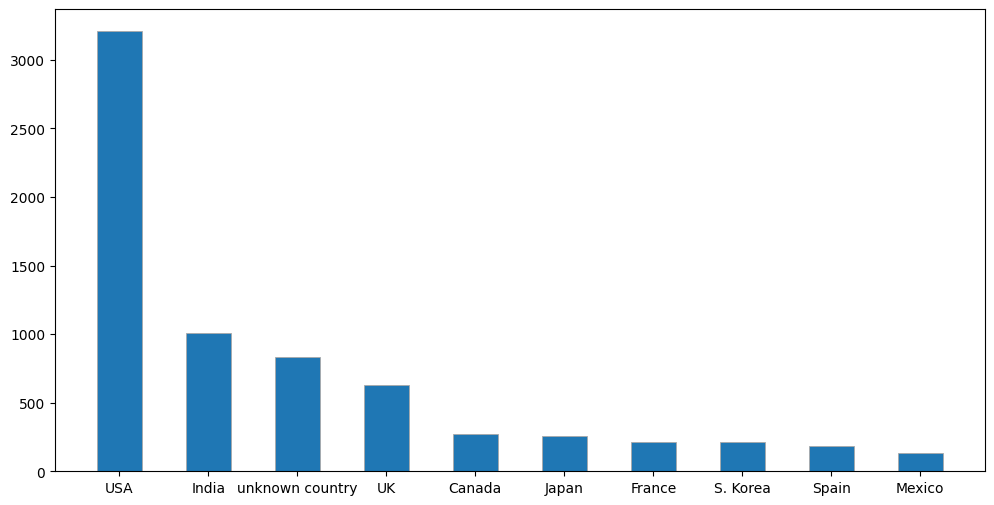

In [ ]:

df['count'] = 1

df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()


df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, edgecolor='darkgray',linewidth=0.6)

In [ ]:
df['first_actor'] = df['cast'].apply(lambda x: x.split(",")[0])
df['first_actor'].head(20)

0                 unknown
1              Ama Qamata
2           Sami Bouajila
3                 unknown
4              Mayur More
5             Kate Siegel
6         Vanessa Hudgens
7            Kofi Ghanaba
8            Mel Giedroyc
9        Melissa McCarthy
10                unknown
11     Sukollawat Kanarot
12            Luna Wedler
13         Klara Castanho
14                unknown
15         Logan Browning
16                unknown
17    Luis Ernesto Franco
18           Freida Pinto
19          Blanca Suárez
Name: first_actor, dtype: object